In [ ]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%matplotlib notebook

In [ ]:
import mpl_toolkits.mplot3d.axes3d as p3

In [ ]:
import numpy as np

In [ ]:
def pde_heat_exp(a,xf,T,Fx,M,N):
    """
    solve a u_xx = u_t for 0<=x<=xf, 0<=t<=T by explicit method
    u(x,0) = it0(x)
    u(0,t) = bx0(t)
    u(xf,t) = bxf(t)
    M : the number of subintervals along x axis
    N : the number of subintervals along t axis
    Fx : the list of function, Fx = [it0,bx0,bxf]
     
    For example:
    Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]
    u, x, t = pde_heat_exp(1.0,1.0,0.1,Fx,20,100)
    Notice that r = a*dt/dx^2 must < 1/2 for stablility
    """
 
    dx, dt = float(xf)/M, float(T)/N
    x = np.linspace(0,xf,M+1)
    t = np.linspace(0,T,N+1)
     
    if len(Fx)!=3:
        print("Fx = [it0,bx0,bxf]")
        return
    it0, bx0, bxf = Fx[0], Fx[1], Fx[2]
 
    ##給定用來放置value的矩陣
    u = np.zeros([N+1,M+1])
    X = np.zeros([N+1,M+1]) #the mesh grids of x
    Y = np.zeros([N+1,M+1]) #the mesh grids of t
 
    for i in range(N+1):
        for j in range(M+1):
            X[i,j] = x[j]
            Y[i,j] = t[i]
             
    #set the boundary condition
    u[0,:] = it0(x)
    u[:,0] = bx0(t)
    u[:,-1] = bxf(t)
 
    r = a*dt/(dx**2)
    r1 = 1 - 2*r
     
    for k in range(N):
        for i in range(1,M):
            u[k+1,i] = r*(u[k,i+1]+u[k,i-1])+r1*u[k,i]
     
    return u, X, Y


In [ ]:
Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]

In [ ]:
u, x, t = pde_heat_exp(1.0,1.0,0.1,Fx,25,100)

In [ ]:
fig = figure()
ax = p3.Axes3D(fig)
ax.plot_wireframe(u,x,t)
fig.show()

<IPython.core.display.Javascript object>

In [ ]:
def pde_heat_imp(a,xf,T,Fx,M,N):
    """
    solve a u_xx = u_t for 0<=x<=xf, 0<=t<=T by explicit method
    u(x,0) = it0(x)
    u(0,t) = bx0(t)
    u(xf,t) = bxf(t)
    M : the number of subintervals along x axis
    N : the number of subintervals along t axis
    Fx : the list of function, Fx = [it0,bx0,bxf]
     
    For example:
    Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]
    u, x, t = pde_heat_imp(1.0,1.0,0.1,Fx,20,100)
    """
 
    dx, dt = float(xf)/M, float(T)/N
    x = np.linspace(0,xf,M+1)
    t = np.linspace(0,T,N+1)
     
    if len(Fx)!=3:
        print ("Fx = [it0,bx0,bxf]")
        return
    it0, bx0, bxf = Fx[0], Fx[1], Fx[2]
 
    u = np.zeros([N+1,M+1])
    X = np.zeros([N+1,M+1]) #the mesh grids of x
    Y = np.zeros([N+1,M+1]) #the mesh grids of t
 
    for i in range(N+1):
        for j in range(M+1):
            X[i,j] = x[j]
            Y[i,j] = t[i]
             
    #set the boundary condition
    u[0,:] = it0(x)
    u[:,0] = bx0(t)
    u[:,-1] = bxf(t)
 
    r = a*dt/(dx**2)
    r2 = 1 + 2*r
 
    #set the linear system
    A = np.zeros([M-1,M-1])
    for i in range(M-1):
        A[i,i] = r2
        if i>1:
            A[i-1,i] = -r
            A[i,i-1] = -r
    #compute each time step        
    for k in range(N):
        b = u[k,1:-1]
        b[0] += r*u[k,0]
        b[-1] += r*u[k,-1]
        u[k+1,1:-1] = solve(A,b)
     
    return u, X, Y

In [ ]:
Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]
u, x, t = pde_heat_imp(1.0,1.0,0.1,Fx,40,100)

<IPython.core.display.Javascript object>


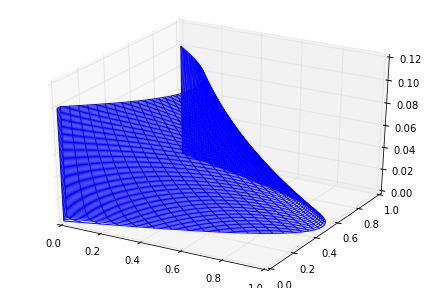

In [ ]:
fig = figure()
ax = p3.Axes3D(fig)
ax.plot_wireframe(u,x,t)
fig.show()

In [ ]:
def pde_heat_CN(a,xf,T,Fx,M,N):
    """
    solve a u_xx = u_t for 0<=x<=xf, 0<=t<=T by explicit method
    u(x,0) = it0(x)
    u(0,t) = bx0(t)
    u(xf,t) = bxf(t)
    M : the number of subintervals along x axis
    N : the number of subintervals along t axis
    Fx : the list of function, Fx = [it0,bx0,bxf]
     
    For example:
    Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]
    u, x, t = pde_heat_CN(1.0,1.0,0.1,Fx,20,100)
    """
 
    dx, dt = float(xf)/M, float(T)/N
    x = np.linspace(0,xf,M+1)
    t = np.linspace(0,T,N+1)
     
    if len(Fx)!=3:
        print ("Fx = [it0,bx0,bxf]")
        return
    it0, bx0, bxf = Fx[0], Fx[1], Fx[2]
 
    ##給定用來放置value的矩陣
    u = np.zeros([N+1,M+1])
    X = np.zeros([N+1,M+1]) #the mesh grids of x
    Y = np.zeros([N+1,M+1]) #the mesh grids of t
 
    for i in range(N+1):
        for j in range(M+1):
            X[i,j] = x[j]
            Y[i,j] = t[i]
             
    #set the boundary condition
    u[0,:] = it0(x)
    u[:,0] = bx0(t)
    u[:,-1] = bxf(t)
 
    r = a*dt/(dx**2)
    r1 = 2*(1+r)
    r2 = 2*(1-r)
 
    #set the linear system
    A = np.zeros([M-1,M-1])
    for i in range(M-1):
        A[i,i] = r1
        if i>1:
            A[i-1,i] = -r
            A[i,i-1] = -r
    #compute each time step        
    for k in range(N):
        b = r*(u[k,0:M-1]+u[k,2:M+1])+r2*u[k,1:M]
        b[0] += r*(u[k,0]+u[k+1,0])
        b[-1] += r*(u[k,-1]+u[k+1,-1])
        u[k+1,1:-1] = solve(A,b)
     
    return u, X, Y

In [ ]:
Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]
u, x, t = pde_heat_CN(1.0,1.0,0.1,Fx,20,100)

<IPython.core.display.Javascript object>


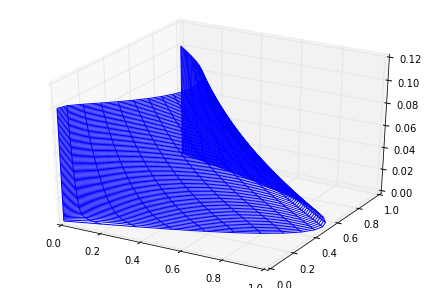

In [ ]:
fig = figure()
ax = p3.Axes3D(fig)
ax.plot_wireframe(u,x,t)
fig.show()

In [ ]:
import numpy.linalg as lg
 
a, xf, T = 1.0, 1.0, 0.1
M, N = 25, 100
Fx = [lambda x:np.sin(np.pi*x), lambda t: 0.0*t, lambda t: 0.0*t]
u_exp, x, t = pde_heat_exp(a,xf,T,Fx,M,N)
u_imp, x, t = pde_heat_imp(a,xf,T,Fx,M,N)
u_cn, x, t = pde_heat_CN(a,xf,T,Fx,M,N)
 
#evalue the true solution
def u(x,t):
    return np.sin(np.pi*x)*np.exp(-t*np.pi**2)
 
m,n = x.shape
u_true = np.zeros([m,n])
for i in range(m):
    for j in range(n):
        u_true[i][j] = u(x[i][j],t[i][j])
 
err_exp = lg.norm(u_true-u_exp)
err_imp = lg.norm(u_true-u_imp)
err_cn = lg.norm(u_true-u_cn)
 
print 'Error of exp method is: ', err_exp
print 'Error of imp method is: ', err_imp
print 'Error of CN method is: ', err_cn
 
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3
fig1 = p.figure(1)
fig2 = p.figure(2)
fig3 = p.figure(3)
ax1 = p3.Axes3D(fig1)
ax2 = p3.Axes3D(fig2)
ax3 = p3.Axes3D(fig3)
ax1.plot_wireframe(u_exp,x,t)
ax2.plot_wireframe(u_imp,x,t)
ax3.plot_wireframe(u_cn,x,t)
p.show()

Error of exp method is:  11.8116266961
Error of imp method is:  1.63702547365
Error of CN method is:  1.33430298931
